In [58]:
import numpy as np 
import pandas as pd 
import os
Dir = "D:/python_enviroments/PythonCodes/数据挖掘/期末作业/"
pklDir =  "D:/python_enviroments/PythonCodes/数据挖掘/期末作业/pkl/"
data=pd.read_csv(Dir+"/google-play-store-apps/googleplaystore_user_reviews.csv",encoding="utf-8")

In [59]:
data.head()  

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [60]:
# 由于只需要判别是不是消极评论，只需要评论和积极性即可
data=pd.concat([data.Translated_Review,data.Sentiment],axis=1)
data.dropna(axis=0,inplace=True) 
data.tail()

,Translated_Review,Sentiment
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive
64230,"Useless app, I searched flats kondapur, Hydera...",Negative


In [61]:
# 将标称型数值改为数值型
data.Sentiment.unique() 
data.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in data.Sentiment]

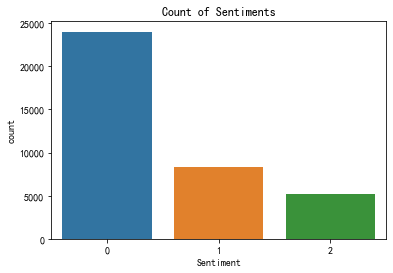

In [62]:
# 对不同情感的评论进行作图
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data.Sentiment)
plt.title("Count of Sentiments")
plt.savefig('Distribution of different emotions.png', dpi=300)

In [63]:
data.Sentiment.value_counts()

0    23998
1     8271
2     5158
Name: Sentiment, dtype: int64

In [64]:
# 使用nltk去除停用词
import nltk  ## Natural Language Tool Kit
from nltk.corpus import stopwords 
# 正则化，去除标点符号且小写，并输出一个样例
import re 


In [65]:
text_list=[]
for review in data.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",review)  
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nltk.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

In [66]:
text_list[:5]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way']

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib
max_features=1000
cou_vec=CountVectorizer(max_features=max_features) 
sparce_matrix=cou_vec.fit_transform(text_list).toarray()
joblib.dump(sparce_matrix,pklDir+'/sparce_matrix.pkl')
joblib.dump(cou_vec,pklDir+'/couvec.pkl')
joblib.dump(text_list,pklDir+'/text_list.pkl')
all_words=cou_vec.get_feature_names()
print("Most used 50 words: ",all_words[0:50])

Most used 50 words:  ['ability', 'able', 'about', 'absolutely', 'access', 'account', 'accurate', 'across', 'action', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'addicted', 'addicting', 'addictive', 'adding', 'advert', 'advertisement', 'after', 'again', 'age', 'ago', 'alarm', 'alert', 'all', 'allow', 'allows', 'almost', 'along', 'alot', 'already', 'also', 'although', 'always', 'am', 'amazing', 'amazon', 'amount', 'an', 'and', 'android', 'anime', 'annoying', 'another', 'answer', 'any', 'anymore']


In [68]:
y = data.iloc[:,1].values
x = sparce_matrix
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))
joblib.dump(rf,pklDir+'/rf.pkl')
y_pred=rf.predict(xtest)
print("RainForest recall score:",recall_score(ytest, y_pred, average='macro'))
print("RainForest Precision recall score:",precision_score(ytest, y_pred, average='macro'))

acc:  0.8936681806037937
RainForest recall score: 0.8509595363057668
RainForest Precision recall score: 0.8703620666438789


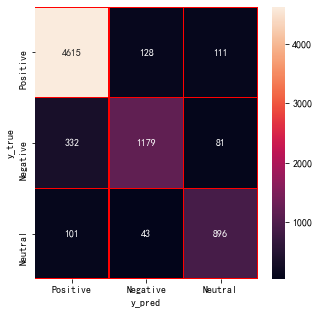

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.savefig('RandomForest Classifier Result.png', dpi=300)
plt.show()


In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

y_probs = lr.predict_proba(xtest)
print("Logistic Regression accuracy: ",lr.score(xtest,ytest))
joblib.dump(rf,pklDir+'/lr.pkl')

Logistic Regression accuracy:  0.8980764092973551


D:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


['D:/python_enviroments/PythonCodes/数据挖掘/期末作业/pkl//lr.pkl']

Logistic regression recall score: 0.8719121309642675
Logistic regression Precision recall score: 0.8623014893319176


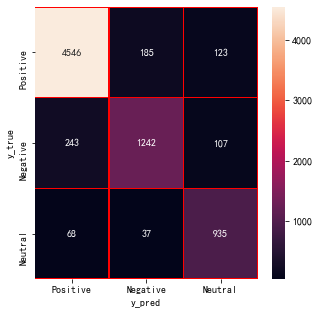

In [71]:
y_pred=lr.predict(xtest)
print("Logistic regression recall score:",recall_score(ytest, y_pred, average='macro'))
print("Logistic regression Precision recall score:",precision_score(ytest, y_pred, average='macro'))
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.savefig('Logesstic Regression Result.png', dpi=100)
plt.show()


In [72]:
def drop_symbols(first_sample):
    temp = re.sub("[^a-zA-Z]"," ",first_sample)
    temp = temp.lower()
    temp=nltk.word_tokenize(temp)
    lemma_temp=nltk.WordNetLemmatizer()
    temp=[lemma_temp.lemmatize(word) for word in temp]
    temp=" ".join(temp)
    text_list.append(temp)
    sparce_matrix_temp=cou_vec.fit_transform(text_list).toarray()
    return [sparce_matrix_temp[-1]]
pred = lr.predict(drop_symbols("It's"))
print(pred)

[2]
